In [18]:
#install the full version of pycaret
!pip install pycaret[full]

In [19]:
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas as pd

In [20]:
#Read the new file
Default_model = pd.read_csv('/content/Default_model.csv')

In [21]:
Default_model.dtypes

,0
loan_amount,float64
bank_funded_amount,float64
term,int64
interest_rate,float64
installment,float64
employment_duration,int64
annual_income,float64
debt_to_income,float64
past_due_2years,float64
open_credit_lines,float64


In [22]:
Default_model.shape

(38478, 19)

In [47]:
#initialize the pycaret setup here
classify_setup = setup(Default_model, target='repay_fail', train_size=0.70, fold = 5, session_id= 30, fix_imbalance = True, use_gpu= True, transformation = False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,30
1,Target,repay_fail
2,Target type,Binary
3,Original data shape,"(38478, 19)"
4,Transformed data shape,"(57252, 19)"
5,Transformed train set shape,"(45708, 19)"
6,Transformed test set shape,"(11544, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [48]:
#Determine the best model, based on the recall score
best_model = compare_models(sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9955,0.9979,0.9836,0.9870,0.9853,0.9826,0.9827,4.5340
qda,Quadratic Discriminant Analysis,0.9790,0.9959,0.9789,0.8928,0.9339,0.9214,0.9228,0.2440
svm,SVM - Linear Kernel,0.9893,0.9953,0.9664,0.9641,0.9648,0.9585,0.9588,0.3780
lightgbm,Light Gradient Boosting Machine,0.9932,0.9982,0.9625,0.9922,0.9771,0.9731,0.9732,1.0000
xgboost,Extreme Gradient Boosting,0.9932,0.9986,0.9618,0.9934,0.9773,0.9734,0.9735,0.9600
dt,Decision Tree Classifier,0.9847,0.9734,0.9574,0.9424,0.9498,0.9407,0.9408,0.7540
rf,Random Forest Classifier,0.9907,0.9981,0.9446,0.9938,0.9686,0.9631,0.9636,9.3060
et,Extra Trees Classifier,0.9906,0.9976,0.9404,0.9971,0.9680,0.9624,0.9630,2.7700
gbc,Gradient Boosting Classifier,0.9882,0.9970,0.9314,0.9898,0.9597,0.9527,0.9534,26.0500
nb,Naive Bayes,0.6299,0.8774,0.9243,0.2808,0.4308,0.2585,0.3597,0.1800


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [49]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=30, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [50]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
LR_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9959,0.9974,0.9816,0.9913,0.9865,0.9840,0.9841
1,0.9963,0.9990,0.9877,0.9877,0.9877,0.9856,0.9856
2,0.9961,0.9977,0.9877,0.9865,0.9871,0.9848,0.9848
3,0.9954,0.9970,0.9804,0.9889,0.9846,0.9819,0.9819
4,0.9941,0.9986,0.9804,0.9804,0.9804,0.9769,0.9769
Mean,0.9955,0.9979,0.9836,0.9870,0.9853,0.9826,0.9827
Std,0.0008,0.0007,0.0034,0.0037,0.0027,0.0031,0.0031


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
#Quadratic Discriminant Analysis
qda_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9814,0.9937,0.9792,0.9059,0.9411,0.9301,0.9311
1,0.9800,0.9967,0.9767,0.8995,0.9365,0.9247,0.9258
2,0.9807,0.9968,0.9865,0.8964,0.9393,0.9279,0.9294
3,0.9777,0.9960,0.9767,0.8875,0.9300,0.9168,0.9183
4,0.9751,0.9964,0.9755,0.8747,0.9224,0.9076,0.9095
Mean,0.9790,0.9959,0.9789,0.8928,0.9339,0.9214,0.9228
Std,0.0023,0.0011,0.0040,0.0108,0.0069,0.0082,0.0080


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
evaluate_model(qda_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

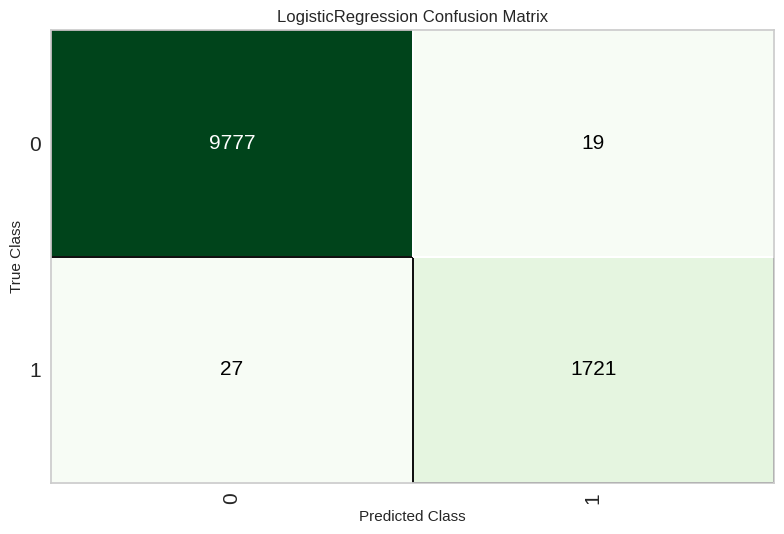

In [54]:
plot_model(LR_model, plot='confusion_matrix')

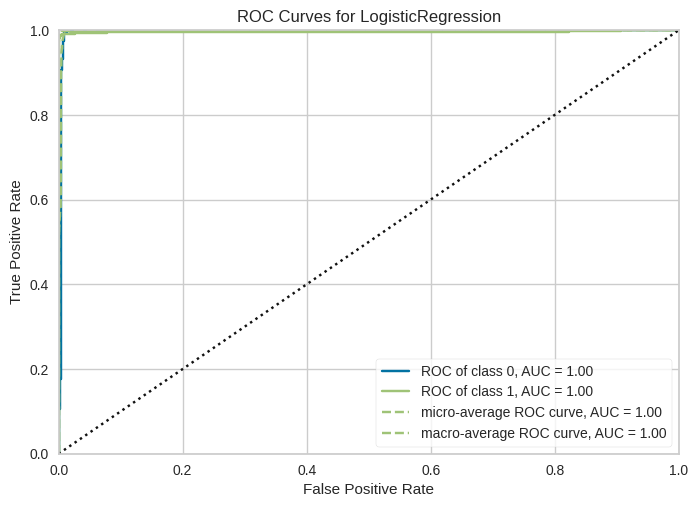

In [55]:
plot_model(LR_model, plot='auc')

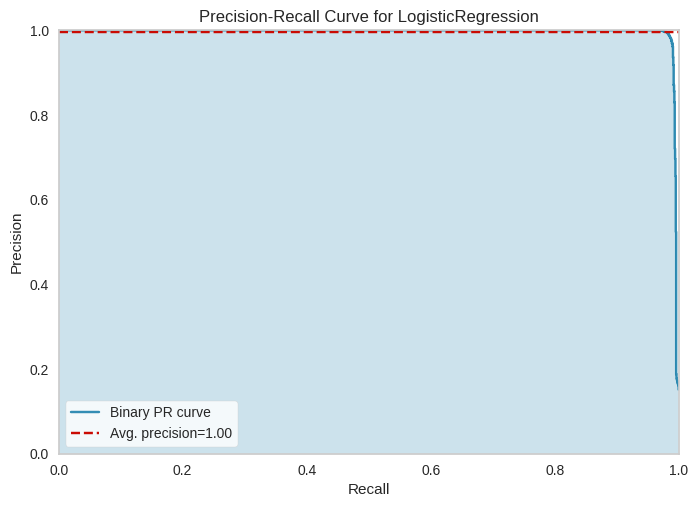

In [56]:
plot_model(LR_model, plot='pr')

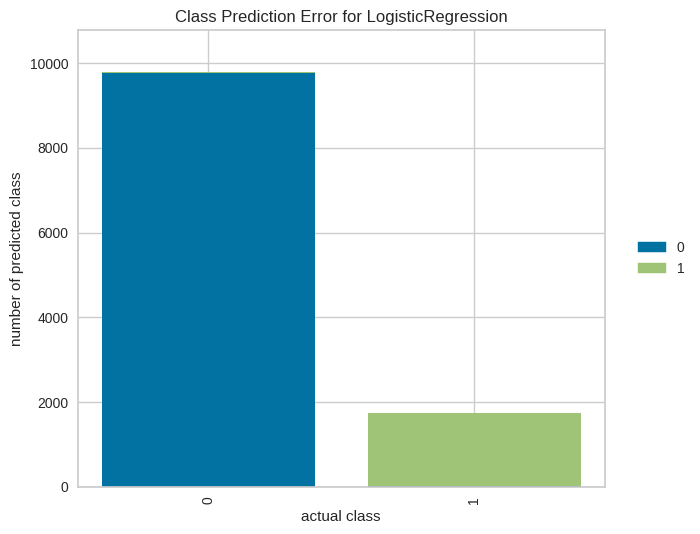

In [57]:
plot_model(LR_model, plot='error')

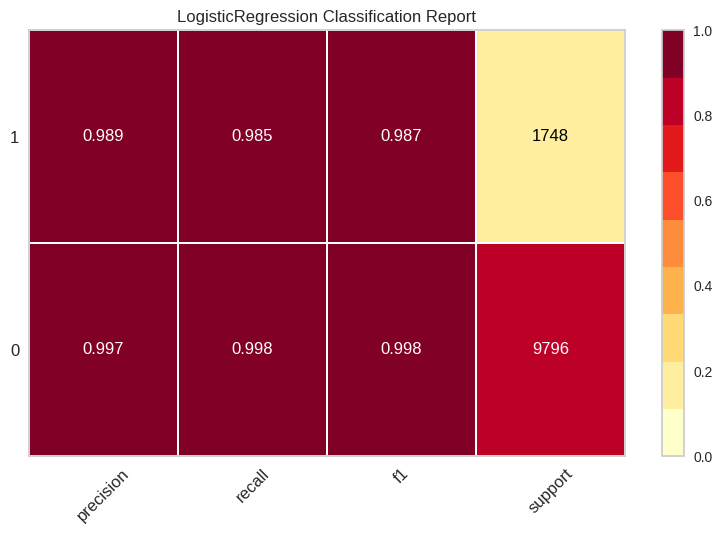

In [58]:
plot_model(LR_model, plot='class_report')

In [59]:
#Save my model
save_model(LR_model, 'LR_model_default')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loan_amount',
                                              'bank_funded_amount', 'term',
                                              'interest_rate', 'installment',
                                              'employment_duration',
                                              'annual_income', 'debt_to_income',
                                              'past_due_2years',
                                              'open_credit_lines',
                                              'public_record',
                                              'revolving_balance',
                                              'total_open_credit_lines',
                                              'sum_interest_lo...
                                     transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
          